In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1

In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


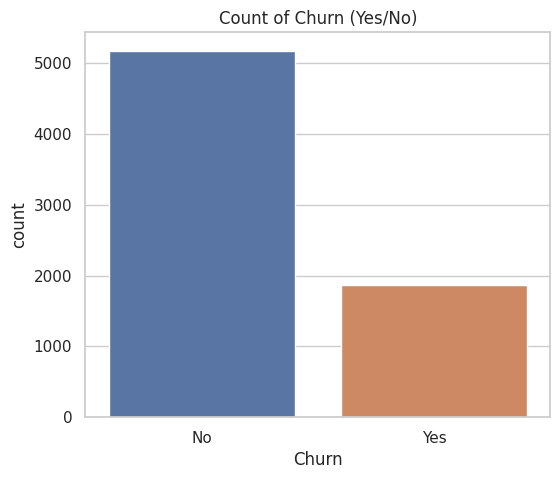

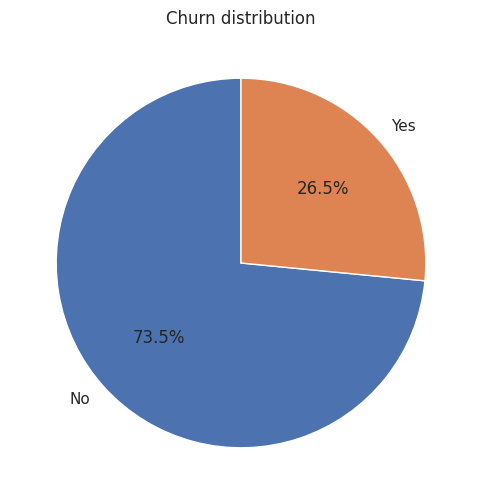

In [9]:
churn_counts = df['Churn'].value_counts()
churn_rates = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print(churn_rates)


plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Churn')
plt.title('Count of Churn (Yes/No)')
plt.show()


plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn distribution')
plt.show()


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
pivot_contract = pd.pivot_table(df, index='Contract', columns='Churn',
                                values='customerID', aggfunc='count').fillna(0)
pivot_contract['Churn_rate'] = pivot_contract['Yes'] / (pivot_contract['Yes'] + pivot_contract['No'])
pivot_contract = pivot_contract.sort_values('Churn_rate', ascending=False)
pivot_contract

Churn,No,Yes,Churn_rate
Contract,,,
Month-to-month,2220,1655,0.427097
One year,1307,166,0.112695
Two year,1647,48,0.028319


In [12]:
pivot_payment = pd.pivot_table(df, index='PaymentMethod', columns='Churn',
                                values='customerID', aggfunc='count').fillna(0)
pivot_payment['Churn_rate'] = pivot_payment['Yes'] / (pivot_payment['Yes'] + pivot_payment['No'])
pivot_payment = pivot_payment.sort_values('Churn_rate', ascending=False)
pivot_payment

Churn,No,Yes,Churn_rate
PaymentMethod,,,
Electronic check,1294,1071,0.452854
Mailed check,1304,308,0.191067
Bank transfer (automatic),1286,258,0.167098
Credit card (automatic),1290,232,0.152431


In [13]:
bins = [0, 1, 6, 12, 24, 48, 72, 200]
labels = ['0','1-6','7-12','13-24','25-48','49-72','72+']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)
pivot_tenure = pd.pivot_table(df, index='tenure_group', columns='Churn',
                              values='customerID', aggfunc='count').fillna(0)
pivot_tenure['Churn_rate'] = pivot_tenure['Yes'] / (pivot_tenure['Yes'] + pivot_tenure['No'])
pivot_tenure = pivot_tenure.sort_index()
pivot_tenure

/tmp/ipykernel_36/2835275454.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tenure = pd.pivot_table(df, index='tenure_group', columns='Churn',
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Churn,No,Yes,Churn_rate
tenure_group,,,
0,244,380,0.608974
1-6,453,404,0.471412
7-12,452,253,0.358865
13-24,730,294,0.287109
25-48,1269,325,0.203890
49-72,2026,213,0.095132
72+,0,0,NaN


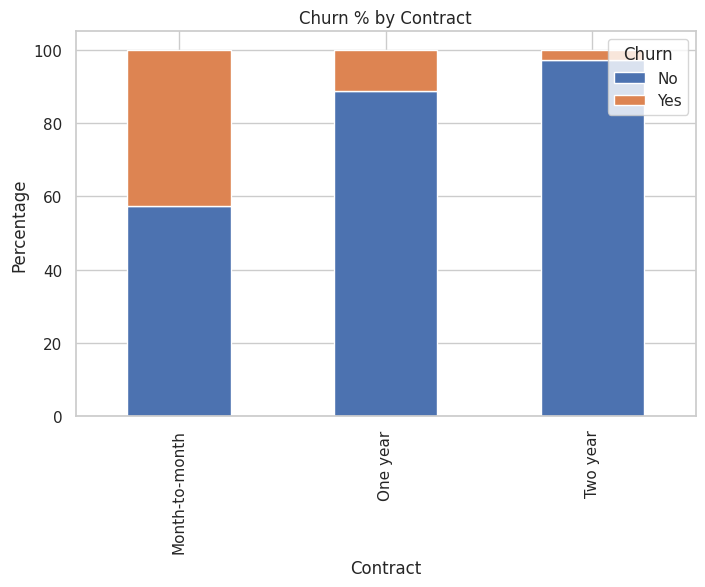

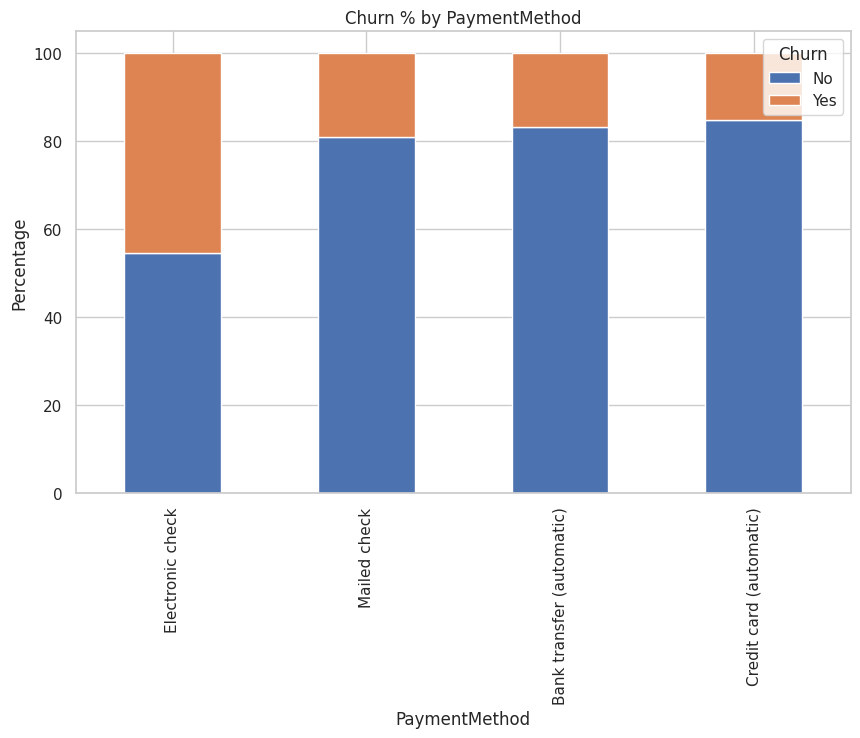

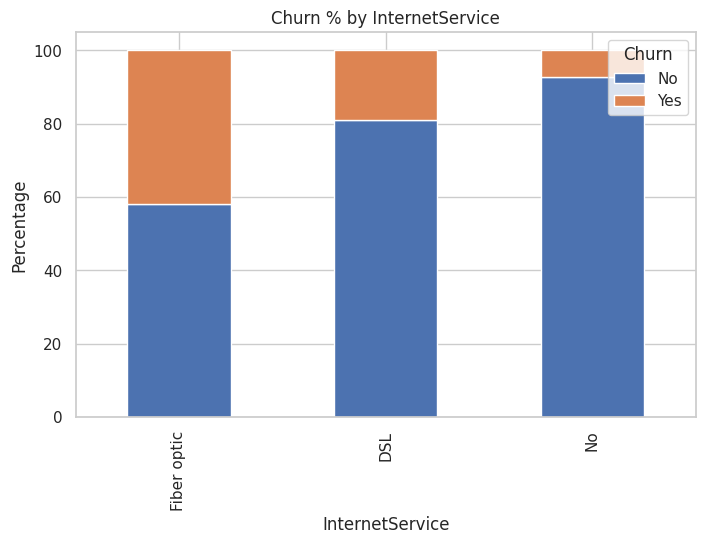

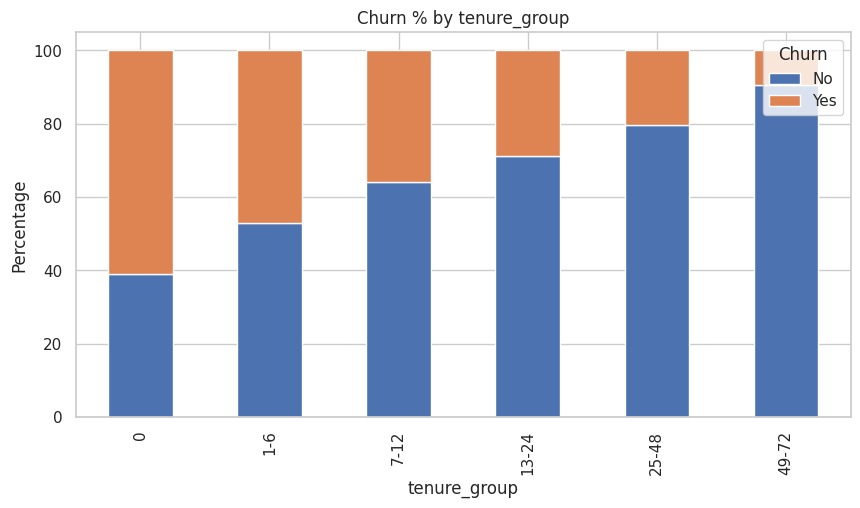

In [14]:
def plot_stacked_bar(feature, figsize=(8,5)):
    ct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    ct = ct.sort_values('Yes', ascending=False)
    ct.plot(kind='bar', stacked=True, figsize=figsize)
    plt.ylabel('Percentage')
    plt.title(f'Churn % by {feature}')
    plt.legend(title='Churn', loc='upper right')
    plt.show()


plot_stacked_bar('Contract', figsize=(8,5))
plot_stacked_bar('PaymentMethod', figsize=(10,6))
plot_stacked_bar('InternetService', figsize=(8,5))
plot_stacked_bar('tenure_group', figsize=(10,5))

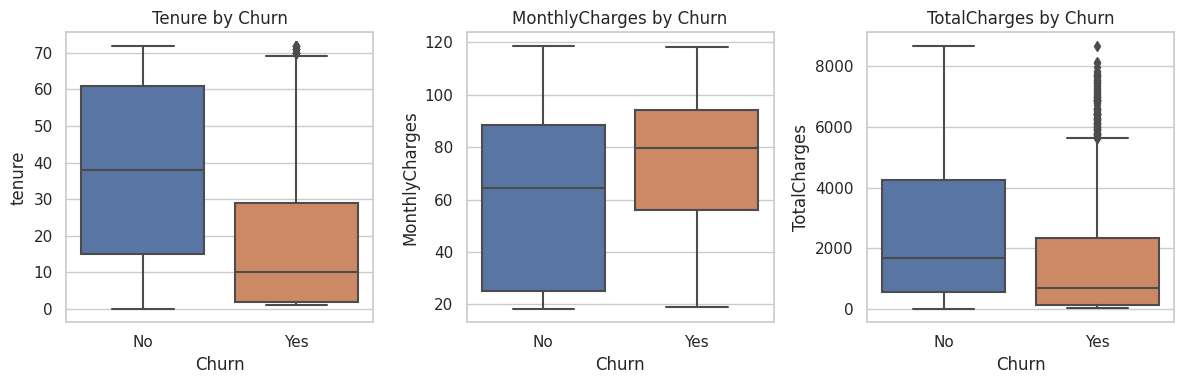

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')

plt.subplot(1,3,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges by Churn')

plt.subplot(1,3,3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges by Churn')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


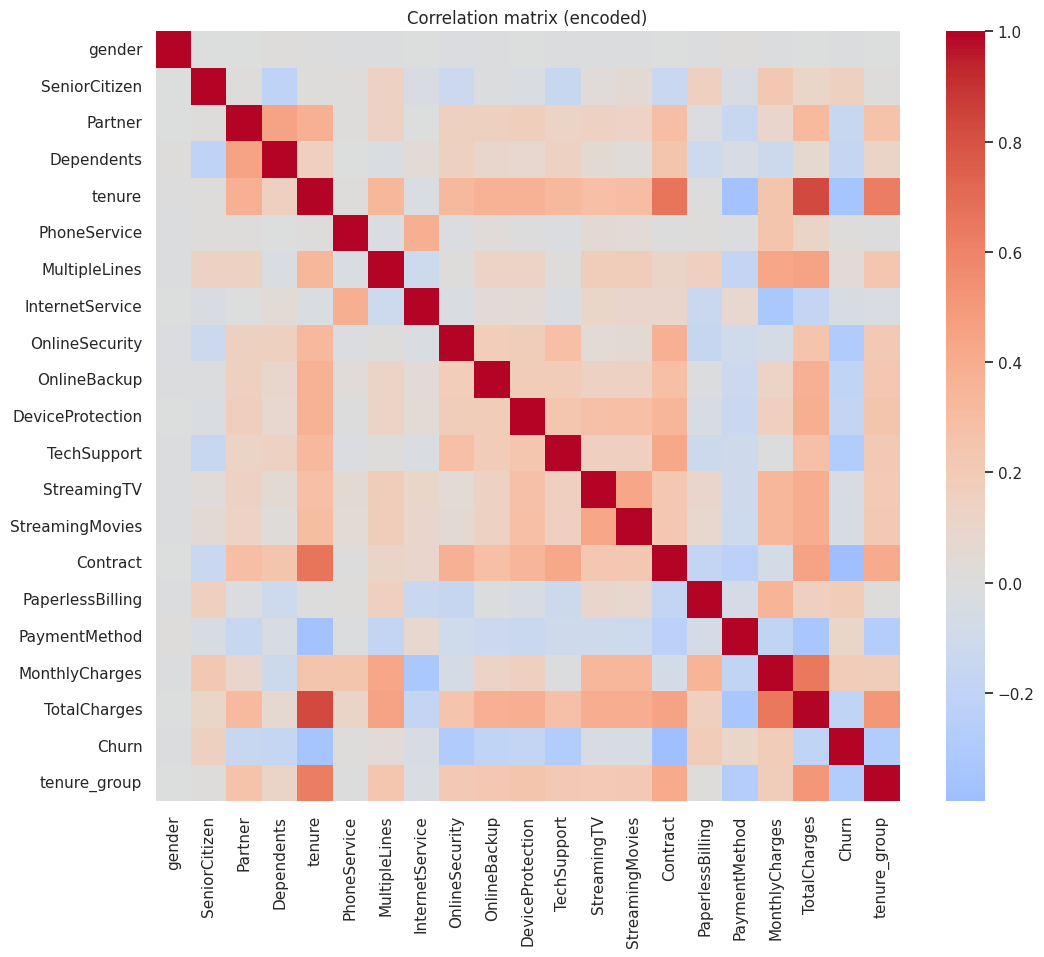

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
tenure_group       -0.279439
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()


if 'customerID' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['customerID'])


cat_cols = df_encoded.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


plt.figure(figsize=(12,10))
corr = df_encoded.corr(numeric_only=True)  
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation matrix (encoded)')
plt.show()


corr_with_churn = corr['Churn'].sort_values(ascending=False)
print(corr_with_churn)


In [17]:

df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].agg(['mean','median','std']).T


features = ['Contract','PaymentMethod','InternetService','SeniorCitizen','PaperlessBilling']
for f in features:
    pt = pd.crosstab(df[f], df['Churn'], normalize='index') * 100
    print("\n", f)
    display(pt.sort_values('Yes', ascending=False).head(10))



 Contract


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858



 PaymentMethod


Churn,No,Yes
PaymentMethod,,
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101



 InternetService


Churn,No,Yes
InternetService,,
Fiber optic,58.107235,41.892765
DSL,81.040892,18.959108
No,92.595020,7.404980



 SeniorCitizen


Churn,No,Yes
SeniorCitizen,,
1,58.318739,41.681261
0,76.393832,23.606168



 PaperlessBilling


Churn,No,Yes
PaperlessBilling,,
Yes,66.434908,33.565092
No,83.669916,16.330084


In [18]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before: Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64
